# Nightingale et al. (2007): Flexion-Extension

- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 16th Januay 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by  Nightingale et al. (2007)

### Summary:

The simulated outputs are compared to the references from PMHS tests reported by  Nightingale et al.  <sup>[1]</sup>
1. NIGHTINGALE, Roger W., et al. [Flexion and extension structural properties and strengths for male cervical spine segments](https://www.sciencedirect.com/science/article/pii/S002192900600073X?via%3Dihub). Journal of biomechanics, 2007, 40.3: 535-542.

<!-- ![](../_env/setup_nightingale_s11.png)  -->
```{figure} ../_env/setup_nightingale_s11.png
---
align: center
---
Setup for C4-C5
```

Testing was performed on 41 unembalmed spinal segments from 16 male cervical spines. Donor age ranged from 51 to 74 years 
### Information on the subjects/specimens
|   **Flexion**   |         |  **Extension**  |         |
| :-------------: | :-----: | :-------------: | :-----: |
| **Specimen ID** | **age** | **Specimen ID** | **age** |
|       B19       |   69    |       B21       |   69    |
|       B22       |   56    |       B23       |   65    |
|       B24       |   71    |       B25       |   74    |
|       B26       |   74    |       B27       |   72    |
|       B28       |   69    |       B29       |   74    |
|       B30       |   51    |       B31       |   64    |
|       B32       |   57    |       B33       |   69    |
|       B34       |   58    |       B35       |   64    |
|    **Mean**     |  63.5   |    **Mean**     |  68.9   |
|    **s.d.**     |    9    |    **s.d.**     |   4.2   |

### Loading and Boundary Conditions
- The lower cervical motion segments (C4–C5 and C6–C7) were cleaned and ast into aluminum cups with fiber-reinforced polyester resin. 
- The cephalad end of the upper cervical spine segments (O–C2) was secured using halo fixation, and both C2 and C3 were cast in order to increase the strength of the fixation
### Boundary Conditions
- `Coordinate system `              : aligned with Global in simulations
> **Setup**
> - ***Load case***                     : Flexion-extension of cervical FSU
> - ***Potting Cups***                  :Cylinder with $\phi=100mm, height=35mm$ polyester resin $E=0.92Gpa, density=1.43g/cm^3, pr=0.44$ modelled with `MAT_1`
>
> **Constraints and Loading** 
> - ***Loading***            : each specimen oaded with pure flexion and ectension moments in 0.5Nm increments. The peak applied moment was approximately 3.5Nm.The load was selected as the it was $10-15\%$ of failure and so as to not compramise ion the integrity of the specimen joint.
> - ***Constraint***           :  `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to fix the bottom pot and measure the raction forces and moments. In the upper potting all the directions other than the loaded direction was fixed.
> - ***Loading Constraint***           : `*BOUNDARY_PRESCRIBED_MOTION_RIGID` to prescribe pure moments with a low angular dispacement in flexion/extension.

### Responses recorded
> - Force measured usig a 6 axis loadcell at the bottom potting
> -  Angular displacement data was acquired using a digital camera system (Kodak, Charlotte, NC). Optical markers were tracked and angular displacements were computed using ImageExpress software (SAI, Utica, NY). The accuracy of the angular displacements was less than 0.1° for the field of view used in this study.

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.


In [1]:
import os
import glob
# for data analysis
import pandas as pd # Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs = {"linestyle" :'--', "color" : 'k',"alpha" :0.7,"linewidth":1}
test_plot = { 'linestyle':'-', 'marker':'s', 'color':'k', 'linewidth' : 1,'alpha':0.5}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" :0.7,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.7,"linewidth":1}
Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 1}
test_corr = {"color": 'silver',"alpha" : 0.7,'linewidth':0.0}
test_corr_line = {"linestyle" :'-.',"color": 'k',"alpha" : 1,'linewidth':1}
Test_avg_norm = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 75,'mfc': 'seagreen','mec': 'seagreen'}

# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [7]:
Tests=['C0_C2_flexion','C0_C2_extension','C4_C5_flexion','C4_C5_extension','C6_C7_flexion','C6_C7_extension']

figures_dir = "../data/processed/SAFER_11.0/figures/"
processed_data_dir = f"../data/processed/SAFER_11.0"
experiment_dir= "../data/experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])

## Postprocessing with dynasaur

In [8]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [9]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/id.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/post_new.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def"]

## Extracting Time Series 

In [10]:
sim_output={}
exp={}
for test in Tests:
    sim_50F = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim_50F.get_defined_calculation_procedures()
    print(commands)
    for command in sim_50F.get_defined_calculation_procedures():
        sim_50F.calculate(command)
    # export post-processed data
    sim_50F.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/post_new.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/id.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rbdout data ...
[READ BINOUT]	done reading rbdout!
[READ BINOUT]	read bndout data ...
[READ BINOUT]	done reading bndout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'Potting_Rot_y', 'x_label': 'time', 'y_label': 'angle'}, {'visualization': 'Potting_Mom_y', 'x_label': 'time', 'y_label': 'moment'}, {'visualization': 'MODEL_Added_Mass', 'x_label': 'time', 'y_label': 'mass'}, {'visualization': 'MODEL_Total_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Internal_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Kinetic_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Hourglass_Energy', 'x_label': 'time', 'y_label': 'energy'}]
[CA

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Potting_Mom_y
[DATA]	read id 4300001 from channel name: ymoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\C0_C2_flexion
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\C0_C2_flexion\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post_new.def
[READ DYNASAUR DEF]	read ../../model/S

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Potting_Mom_y
[DATA]	read id 4300001 from channel name: ymoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\C0_C2_extension
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\C0_C2_extension\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post_new.def
[READ DYNASAUR DEF]	read ../../mod

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Potting_Mom_y
[DATA]	read id 4300001 from channel name: ymoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\C4_C5_flexion
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\C4_C5_flexion\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post_new.def
[READ DYNASAUR DEF]	read ../../model/S

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Potting_Mom_y
[DATA]	read id 4300001 from channel name: ymoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\C4_C5_extension
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\C4_C5_extension\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post_new.def
[READ DYNASAUR DEF]	read ../../mod

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Potting_Mom_y
[DATA]	read id 4300001 from channel name: ymoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\C6_C7_flexion
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\C6_C7_flexion\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/post_new.def
[READ DYNASAUR DEF]	read ../../model/S

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: Potting_Mom_y
[DATA]	read id 4300001 from channel name: ymoment
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0\C6_C7_extension
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0\C6_C7_extension\Dynasaur_output.csv


### Stiffness plots

In [11]:
 # Import experimental data
exp=pd.read_csv(os.path.join(experiment_dir,'test.csv'),delimiter=';',header=[0,1,2])

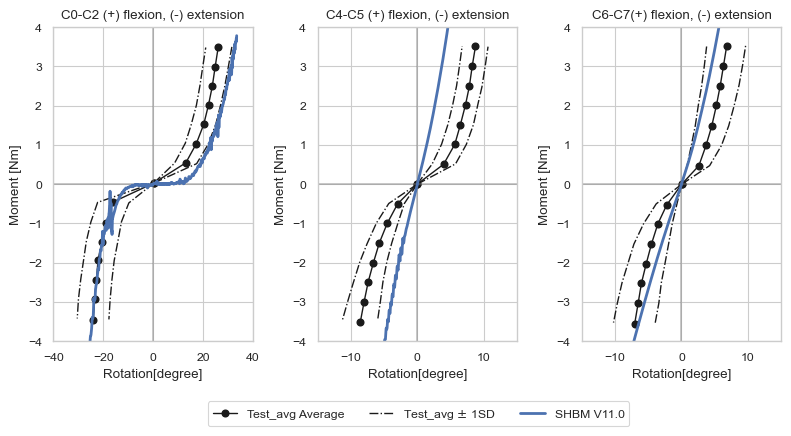

In [12]:
fig_rom, ax = plt.subplots(nrows=1, ncols=3,figsize=(8, 4))
# --------------------------------------------------------------O-C1--------------------------------------------------------------
ax[0].set(title='C0-C2 (+) flexion, (-) extension',xlabel='Rotation[degree]',ylabel='Moment [Nm]',ylim=[-4,4],xlim=[-40,40])

ax[0].plot(exp.FLEX.OC2A.R,exp.FLEX.OC2A.M,label='Test_avg Average',**Test_avg)
ax[0].plot(exp.FLEX.OC2U.R,exp.FLEX.OC2U.M,label='Test_avg $\pm$ 1SD',**test_corr_line)
ax[0].plot(exp.FLEX.OC2L.R,exp.FLEX.OC2L.M,**test_corr_line)

ax[0].plot(exp.EXT.OC2A.R,exp.EXT.OC2A.M,**Test_avg)
ax[0].plot(exp.EXT.OC2U.R,exp.EXT.OC2U.M,**test_corr_line)
ax[0].plot(exp.EXT.OC2L.R,exp.EXT.OC2L.M,**test_corr_line)

ax[0].axhline(y=0,color='gray',alpha=0.5)
ax[0].axvline(x=0, color='gray',alpha=0.5)
ax[0].plot(np.degrees(sim_output['C0_C2_flexion'].Potting.Rot_y.angle.iloc[0:720]),sim_output['C0_C2_flexion'].Potting.Mom_y.moment.iloc[0:720],**s11,label='SHBM V11.0')
ax[0].plot(-np.degrees(sim_output['C0_C2_extension'].Potting.Rot_y.angle.iloc[0:720]),-sim_output['C0_C2_extension'].Potting.Mom_y.moment.iloc[0:720],**s11)
# --------------------------------------------------------------C4-C5--------------------------------------------------------------
ax[1].set(title='C4-C5 (+) flexion, (-) extension',xlabel='Rotation[degree]',ylabel='Moment [Nm]',ylim=[-4,4],xlim=[-15,15])

ax[1].plot(exp.FLEX.C45A.R,exp.FLEX.C45A.M,**Test_avg)
ax[1].plot(exp.FLEX.C45U.R,exp.FLEX.C45U.M,**test_corr_line)
ax[1].plot(exp.FLEX.C45L.R,exp.FLEX.C45L.M,**test_corr_line)

ax[1].plot(exp.EXT.C45A.R,exp.EXT.C45A.M,**Test_avg)
ax[1].plot(exp.EXT.C45U.R,exp.EXT.C45U.M,**test_corr_line)
ax[1].plot(exp.EXT.C45L.R,exp.EXT.C45L.M,**test_corr_line)

ax[1].axhline(y=0, color='gray',alpha=0.5)
ax[1].axvline(x=0, color='gray',alpha=0.5)
ax[1].plot(np.degrees(sim_output['C4_C5_flexion'].Potting.Rot_y.angle.iloc[0:250]),sim_output['C4_C5_flexion'].Potting.Mom_y.moment.iloc[0:250],**s11)
ax[1].plot(-np.degrees(sim_output['C4_C5_extension'].Potting.Rot_y.angle.iloc[0:250]),-sim_output['C4_C5_extension'].Potting.Mom_y.moment.iloc[0:250], **s11)
# --------------------------------------------------------------C6-C7--------------------------------------------------------------
ax[2].set(title='C6-C7(+) flexion, (-) extension',xlabel='Rotation[degree]',ylabel='Moment [Nm]',ylim=[-4,4],xlim=[-15,15])

ax[2].plot(exp.FLEX.C67A.R,exp.FLEX.C67A.M,**Test_avg)
ax[2].plot(exp.FLEX.C67U.R,exp.FLEX.C67U.M,**test_corr_line)
ax[2].plot(exp.FLEX.C67L.R,exp.FLEX.C67L.M,**test_corr_line)

ax[2].plot(exp.EXT.C67A.R,exp.EXT.C67A.M,**Test_avg)
ax[2].plot(exp.EXT.C67U.R,exp.EXT.C67U.M,**test_corr_line)
ax[2].plot(exp.EXT.C67L.R,exp.EXT.C67L.M,**test_corr_line)

ax[2].axhline(y=0, color='gray',alpha=0.5)
ax[2].axvline(x=0, color='gray',alpha=0.5)
ax[2].plot(np.degrees(sim_output['C6_C7_flexion'].Potting.Rot_y.angle.iloc[0:250]),sim_output['C6_C7_flexion'].Potting.Mom_y.moment.iloc[0:250],**s11)
ax[2].plot(-np.degrees(sim_output['C6_C7_extension'].Potting.Rot_y.angle.iloc[0:250]),-sim_output['C6_C7_extension'].Potting.Mom_y.moment.iloc[0:250], **s11)

fig_rom.legend(bbox_to_anchor=(0.8, 0), ncol=3);
fig_rom.tight_layout()

In [22]:
Tests=['C0_C2_flexion','C0_C2_extension','C4_C5_flexion','C4_C5_extension','C6_C7_flexion','C6_C7_extension']

df_v11={}
for test in Tests:
    df_v11[test]=pd.read_csv(os.path.join(os.path.join("../data/processed/SAFER_11.0",test),"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

### Range of motion in $\pm$ 1 Nm

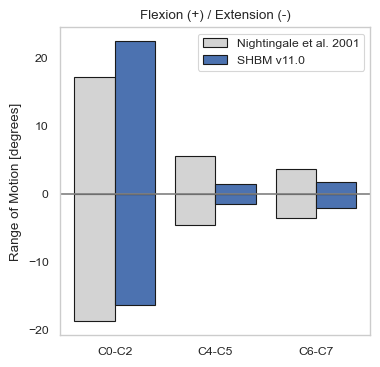

In [23]:
def moment_angle(test,Nm):
    index_v11=df_v11[test].Potting.Mom_y.moment[df_v11[test].Potting.Mom_y.moment>=Nm].dropna().index[0]
    return np.degrees(df_v11[test].Potting.Rot_y.angle.iloc[index_v11][0])
v11=[]
for test in Tests:
    e=moment_angle(test,1)
    v11.append(e)
    
test={'width' : 0.4 ,'color':'lightgray','alpha':1, 'edgecolor':'k'}
S11={'width' : 0.4 ,'color':'b','alpha':1, 'edgecolor':'k'}
V11_E=[-v11[1],-v11[3],-v11[5]]
V11_F=[v11[0],v11[2],v11[4]]
fig, ax = plt.subplots(figsize=(4, 4))

br1 = np.arange(3)
ax.bar(br1-0.2,exp.iloc[2,:].FLEX[['OC2A','C45A','C67A']].values[1::2],
       **test,label='Nightingale et al. 2001')
ax.bar(br1-0.2,exp.iloc[2,:].EXT[['OC2A','C45A','C67A']].values[1::2]
       , capsize=3,**test)
ax.bar(br1+0.2,V11_E,label='SHBM v11.0',**S11)
ax.bar(br1+0.2,V11_F,**S11)

ax.grid(None)
ax.axhline(0,linewidth=1.2,color='grey')
plt.xticks(range(3), ['C0-C2','C4-C5','C6-C7'], rotation=0);
plt.legend();
plt.ylabel('Range of Motion [degrees]');
plt.title('Flexion (+) / Extension (-)');


### ROM at $\pm$ 3.5Nm

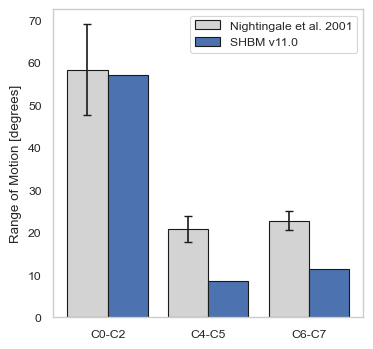

In [24]:
def moment_angle(test,Nm):
    index_v11=df_v11[test].Potting.Mom_y.moment[df_v11[test].Potting.Mom_y.moment>=Nm].dropna().index[0]
    return np.degrees(df_v11[test].Potting.Rot_y.angle.iloc[index_v11][0])

v11=[]
for test in Tests:
    e=moment_angle(test,3.5)
    v11.append(e)
V11_ROM=[v11[0]+v11[1],v11[2]+v11[3],v11[4]+v11[5]]

test={'width' : 0.4 ,'color':'lightgray','alpha':1, 'edgecolor':'k'}
S11={'width' : 0.4 ,'color':'b','alpha':1, 'edgecolor':'k'}
fig, ax = plt.subplots(figsize=(4, 4))
test_ROM=[58.4,20.8,22.8]
err=[10.7,3,2.3]
br1 = np.arange(3)
ax.bar(br1-0.2,test_ROM,yerr=err, capsize=3,**test,label='Nightingale et al. 2001')
ax.bar(br1+0.2,V11_ROM,label='SHBM v11.0',**S11)

ax.grid(None)
plt.xticks(range(3), ['C0-C2','C4-C5','C6-C7'], rotation=0);
plt.legend();
plt.ylabel('Range of Motion [degrees]');


## Energy Plots

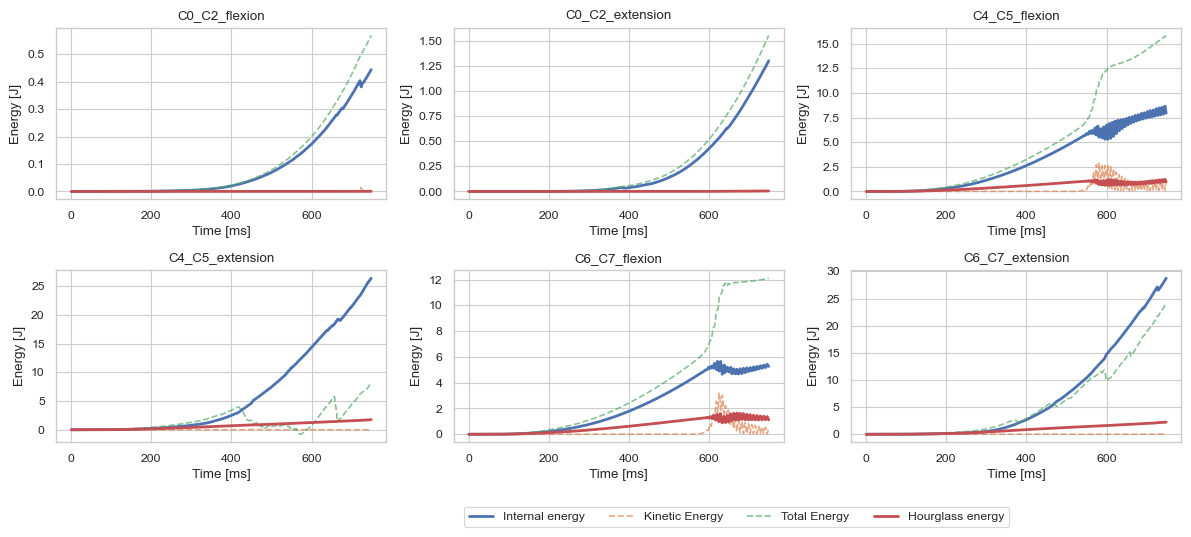

In [21]:
fig_fd, axs = plt.subplots(nrows=2, ncols=3,figsize=(12,5))
i=0
for ax in axs.flat:
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]')
    i=i+1
fig_fd.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.85,-0.01),ncol=4);
fig_fd.tight_layout()